## Scikit -Learn 패키지를 이용한 분류 문제 연습

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

## 1. load_digits: 손글씨 분류

### 1) 데이터 탐색

* load_digit() 메서드로 불러온 데이터는 64개의 feature를 가진 1797개의 샘플을 보유하고 있다.
* 이 데이터는 0에서 9까지의 숫자의 손글씨 이미지 데이터로서, 하나의 샘플은 8×8 = 64픽셀로 이루어져 있다. 각 픽셀은 64개의 feature로 저장되어 있다.
* 이 중 약 20%에 해당하는 360개 샘플을 테스트 데이터로 무작위 분리하였다.

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
type(digits)

sklearn.utils.Bunch

In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
digits.data.shape    

(1797, 64)

In [6]:
digits.target.shape

(1797,)

In [7]:
feature = digits.data 
label = digits.target

In [8]:
print(digits.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


feature_names는 **`이미지 샘플들이 (0,0) 부터 (7,7) 까지 정렬된 픽셀의 배열로써 존재`하며, digits 데이터의 feature 자체가 각 이미지를 이루고 있는 픽셀 값 하나하나로 구성되어 있음을 시사한다.**

In [9]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [11]:
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size = 0.2, random_state = 50)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)


In [12]:
import pandas as pd

df = pd.DataFrame(digits.target)
df.head()

,0
0,0
1,1
2,2
3,3
4,4


In [13]:
print(df[0].value_counts())

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: 0, dtype: int64


데이터가 균등하게 분포하고 있는지 target을 Dataframe화 하여 알아본 결과, **`1797개 샘플 내 10개의 숫자는 약 10% 씩으로 균등하게 분포`**하고 있음을 확인할 수 있다.

### 2) 다양한 모델로 학습, 비교해보기

* digits 데이터는 분류하고자 하는 target이 충분히 각 클래스에 균등하게 분포하고 있으므로 평가지표로 accuracy를 택했다.
* Decision Tree가 가장 낮은 accuracy를, Support Vector Machine이 가장 높은 accuracy를 보였다.
  * digits 데이터는 feature가 64개이므로, decision tree를 만들었을 때 depth가 다소 깊어져 학습데이터에 대해 overfitting이 발생하여 accuracy가 떨어졌을 가능성이 높다.
* [scikit learn tutorial](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)에 의하면 분류 문제 중 데이터 샘플의 갯수가 약 십만개 보다 적을 경우에는 Linear SVC 모델을 쓰는 것이 적합하다.

In [14]:
Tree = DecisionTreeClassifier(random_state = 50)
Tree.fit(X_train, y_train)
y_pred = Tree.predict(X_test)
print("\t<Classification Report of Descision Tree>\n")
print(classification_report(y_test, y_pred))

	<Classification Report of Descision Tree>

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.94      0.76      0.84        42
           2       0.91      0.87      0.89        45
           3       0.81      0.76      0.79        29
           4       0.76      0.94      0.84        31
           5       0.79      0.87      0.83        31
           6       0.97      0.87      0.92        38
           7       0.86      0.89      0.87        35
           8       0.57      0.71      0.63        28
           9       0.82      0.80      0.81        40

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.86      0.84      0.85       360



In [15]:
Forest = RandomForestClassifier(random_state = 50)
Forest.fit(X_train, y_train)
y_pred = Forest.predict(X_test)
print("\t<Classification Report of Ramdom Forest>\n")
print(classification_report(y_test, y_pred))

	<Classification Report of Ramdom Forest>

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.95      1.00      0.98        42
           2       0.98      1.00      0.99        45
           3       0.93      0.90      0.91        29
           4       0.97      1.00      0.98        31
           5       0.97      0.97      0.97        31
           6       1.00      0.97      0.99        38
           7       0.94      0.97      0.96        35
           8       0.93      0.89      0.91        28
           9       0.97      0.93      0.95        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [16]:
SVM = svm.SVC()
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print("\t<Classification Report of Support Vector Machine>\n")
print(classification_report(y_test, y_pred))

	<Classification Report of Support Vector Machine>

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.98      1.00      0.99        42
           2       1.00      1.00      1.00        45
           3       1.00      0.97      0.98        29
           4       0.97      1.00      0.98        31
           5       0.97      0.97      0.97        31
           6       1.00      1.00      1.00        38
           7       1.00      0.97      0.99        35
           8       1.00      0.96      0.98        28
           9       0.95      1.00      0.98        40

    accuracy                           0.99       360
   macro avg       0.99      0.98      0.99       360
weighted avg       0.99      0.99      0.99       360



In [17]:
SGD = SGDClassifier()
SGD.fit(X_train, y_train)
y_pred = SGD.predict(X_test)
print("\t<Classification Report of Stochastic Gradient Descent Classifier>\n")
print(classification_report(y_test, y_pred))

	<Classification Report of Stochastic Gradient Descent Classifier>

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.87      0.93      0.90        42
           2       1.00      1.00      1.00        45
           3       1.00      0.86      0.93        29
           4       1.00      0.97      0.98        31
           5       1.00      0.94      0.97        31
           6       1.00      1.00      1.00        38
           7       0.94      0.97      0.96        35
           8       0.76      0.93      0.84        28
           9       0.92      0.88      0.90        40

    accuracy                           0.95       360
   macro avg       0.95      0.94      0.95       360
weighted avg       0.95      0.95      0.95       360



In [18]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print("\t<Classification Report of Logistic Regression>\n")
print(classification_report(y_test, y_pred))

	<Classification Report of Logistic Regression>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.95      0.95      0.95        42
           2       1.00      1.00      1.00        45
           3       0.96      0.93      0.95        29
           4       0.94      0.97      0.95        31
           5       1.00      0.90      0.95        31
           6       1.00      1.00      1.00        38
           7       1.00      0.94      0.97        35
           8       0.96      0.96      0.96        28
           9       0.89      1.00      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


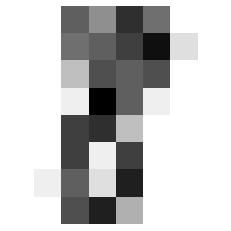

예측값: 9 | 실제값: 7


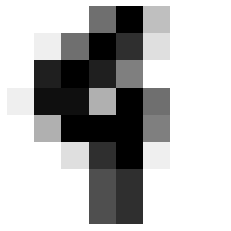

예측값: 5 | 실제값: 3


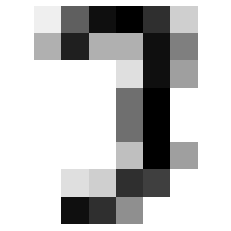

예측값: 9 | 실제값: 5


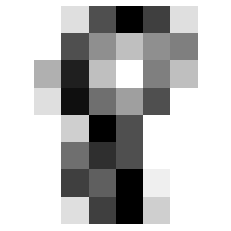

예측값: 1 | 실제값: 8


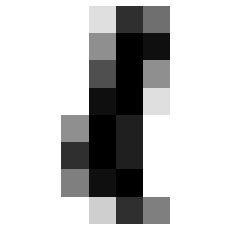

예측값: 4 | 실제값: 0


In [19]:
# SVM의 오답 찾기: 

import matplotlib.pyplot as plt
%matplotlib inline

SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
y_wrong = y_test - y_pred

for i in range(len(y_wrong)):
    if y_wrong[i] != 0:
        plt.imshow(digits.images[i].reshape(8,8), cmap = plt.cm.binary)
        plt.axis('off')
        plt.show()
        print('예측값:', y_pred[i], '| 실제값:', y_test[i])

**SVM 모델이 오답을 낸 데이터 이미지들은 손글씨 중에서도 선의 경계가 다소 모호한 글씨로 보인다. SVM 모델은 데이터의 경계를 구분하여 클래스를 분류하므로 위 5개 글씨 분류에 실패한 것으로 추정된다.**

## 2. load_wine: 와인의 종류 분류

### 1) 데이터 탐색

* load_wine() 메서드로 불러온 데이터는 13개의 feature를 가진 178개의 샘플을 보유하고 있다.
* 이 데이터는 와인의 종류를 'class_0', 'class_1', 'class_2' 세가지 라벨로 가지고 있는 데이터이며, feature는 'alcohol','malic_acid' 등 와인이 가질 수 있는 여러가지 특성들을 나타낸다.
* 이 중 약 20%에 해당하는 36개 샘플을 테스트 데이터로 무작위 분리하였다.

In [20]:
from sklearn.datasets import load_wine
wine = load_wine()

In [21]:
type(wine)

sklearn.utils.Bunch

In [22]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [23]:
wine.data.shape

(178, 13)

In [24]:
wine.target.shape

(178,)

In [25]:
feature = wine.data 
label = wine.target

In [26]:
print(wine.feature_names)
print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [27]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [28]:
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size = 0.2, random_state = 50)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(142, 13)
(36, 13)
(142,)
(36,)


### 2) 다양한 모델로 학습, 비교해보기

* 데이터 describe에 의하면 class_0 약 33%, class_1 약 40%, class_2 약 27% 비율로 분포하고 있어 비교적 균등하게 분포되어 있는 편이므로 accuracy를 평가지표로 택했다.
* Stochastic Gradient Descent Classifier가 가장 낮은 accuracy를, Random Forest가 가장 높은 accuracy를 보였다. 특히 SVM과 SGD 모델은 class_2를 분류하는 데에 완전히 실패하여 부적절한 모델로 판단된다. 
  * SVM과 SGD는 Desicion Tree나 Random Forest에 비해 더 복잡한 모델인만큼, wine 데이터보다 더 광범위한 데이터 문제에 적합할 것으로 예상된다.
* Random Forest는 Desicion Tree가 혼동한 class_0과 class_1 분류를 보완하는 것으로 보인다.

In [29]:
Tree = DecisionTreeClassifier(random_state = 50)
Tree.fit(X_train, y_train)
y_pred = Tree.predict(X_test)
print("\t<Classification Report of Descision Tree>\n")
print(classification_report(y_test, y_pred))

	<Classification Report of Descision Tree>

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.87      0.93      0.90        14
           2       1.00      1.00      1.00         9

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.93        36
weighted avg       0.92      0.92      0.92        36



In [30]:
Forest = RandomForestClassifier(random_state = 50)
Forest.fit(X_train, y_train)
y_pred = Forest.predict(X_test)
print("\t<Classification Report of Ramdom Forest>\n")
print(classification_report(y_test, y_pred))

	<Classification Report of Ramdom Forest>

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [31]:
SVM = svm.SVC()
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print("\t<Classification Report of Support Vector Machine>\n")
print(classification_report(y_test, y_pred))

	<Classification Report of Support Vector Machine>

              precision    recall  f1-score   support

           0       0.90      0.69      0.78        13
           1       0.50      0.93      0.65        14
           2       0.00      0.00      0.00         9

    accuracy                           0.61        36
   macro avg       0.47      0.54      0.48        36
weighted avg       0.52      0.61      0.54        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
SGD = SGDClassifier()
SGD.fit(X_train, y_train)
y_pred = SGD.predict(X_test)
print("\t<Classification Report of Stochastic Gradient Descent Classifier>\n")
print(classification_report(y_test, y_pred))

	<Classification Report of Stochastic Gradient Descent Classifier>

              precision    recall  f1-score   support

           0       1.00      0.54      0.70        13
           1       0.48      1.00      0.65        14
           2       0.00      0.00      0.00         9

    accuracy                           0.58        36
   macro avg       0.49      0.51      0.45        36
weighted avg       0.55      0.58      0.51        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print("\t<Classification Report of Logistic Regression>\n")
print(classification_report(y_test, y_pred))

	<Classification Report of Logistic Regression>

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.88      1.00      0.93        14
           2       1.00      1.00      1.00         9

    accuracy                           0.94        36
   macro avg       0.96      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df["label"] = wine.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [35]:
grouped = df['od280/od315_of_diluted_wines'].groupby(df['label']) 
print(grouped.mean())
print(grouped.std())

label
0    3.157797
1    2.785352
2    1.683542
Name: od280/od315_of_diluted_wines, dtype: float64
label
0    0.357077
1    0.496573
2    0.272111
Name: od280/od315_of_diluted_wines, dtype: float64


Dataframe화 하여 둘러본 결과, 'od280/od315_of_diluted_wines' feature가 label별로 차이를 보이는 경향성이 육안상으로 발견되었다. 'od280/od315_of_diluted_wines'칼럼을 라벨별로 그룹화하여 grouped 객체에 저장, 평균값을 출력해보니 각 클래스 별로 눈에 띄는 차이를 보이며, 표준편차 또한 작은 편으로 **`'od280/od315_of_diluted_wines' feature가 분류에 핵심적으로 사용되었을 가능성을 시사`**한다. 이때 class_0과 class_1의 od280/od315_of_diluted_wines 평균은 각각 약 3.2, 약 2.8로 차이가 크지 않음을 확인할 수 있는데, 이로 인해 가장 accuracy가 높았던 Random Forest에서도 class_0과 class_1을 구분하는 것에 일부 오답이 발생했을 것으로 추측된다.

## 3. load_breast_cancer:  유방암 여부 진단

### 1) 데이터 탐색

* load_breast_cancer() 메서드로 불러온 데이터는 30개의 feature를 가진 569개의 샘플을 보유하고 있다.
* 각 샘플은 30개의 feature와 진단 결과 label('양성'(malignant) 또는 '음성'(benign))을 갖는다.
  * 데이터 describe에 의하면 malignant 212개, benign 357개가 존재한다. label은 텍스트 형태로 존재하지 않고 0과 1로 나타나는데, Dataframe화 하여 각 label의 갯수를 나타내어본 결과 0이 양성, 1이 음성을 나타냄을 확인할 수 있었다.
* 이 중 약 20%에 해당하는 114개 샘플을 테스트 데이터로 무작위 분리하였다.

In [36]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [37]:
type(cancer)

sklearn.utils.Bunch

In [38]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [39]:
cancer.data.shape

(569, 30)

In [40]:
cancer.target.shape

(569,)

In [41]:
feature = cancer.data 
label = cancer.target

In [42]:
print(cancer.feature_names)
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [43]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [44]:
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size = 0.2, random_state = 50)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [45]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df["label"] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [46]:
print(df['label'].value_counts())

1    357
0    212
Name: label, dtype: int64


### 2) 다양한 모델로 학습, 비교해보기

* 이 데이터는 병의 진단 결과인만큼, 양성을 음성으로 진단했을 경우의 피해가 매우 크므로 '양성(0)'의 'recall'을 평가지표로 택했다.
* Random Forest의 recall이 가장 높고, Support Vector Machine과 Stochastic Gradient Descent Classifier의 recall이 가장 낮았다. 

In [47]:
Tree = DecisionTreeClassifier(random_state = 50)
Tree.fit(X_train, y_train)
y_pred = Tree.predict(X_test)
print("\t<Classification Report of Descision Tree>\n")
print(classification_report(y_test, y_pred))

	<Classification Report of Descision Tree>

              precision    recall  f1-score   support

           0       0.85      0.90      0.88        39
           1       0.95      0.92      0.93        75

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.91      0.91       114



In [48]:
Forest = RandomForestClassifier(random_state = 50)
Forest.fit(X_train, y_train)
y_pred = Forest.predict(X_test)
print("\t<Classification Report of Ramdom Forest>\n")
print(classification_report(y_test, y_pred))

	<Classification Report of Ramdom Forest>

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        39
           1       0.97      0.96      0.97        75

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [49]:
SVM = svm.SVC()
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print("\t<Classification Report of Support Vector Machine>\n")
print(classification_report(y_test, y_pred))

	<Classification Report of Support Vector Machine>

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [50]:
SGD = SGDClassifier()
SGD.fit(X_train, y_train)
y_pred = SGD.predict(X_test)
print("\t<Classification Report of Stochastic Gradient Descent Classifier>\n")
print(classification_report(y_test, y_pred))

	<Classification Report of Stochastic Gradient Descent Classifier>

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        39
           1       0.93      0.92      0.93        75

    accuracy                           0.90       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.90      0.90      0.90       114



In [51]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print("\t<Classification Report of Logistic Regression>\n")
print(classification_report(y_test, y_pred))

	<Classification Report of Logistic Regression>

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        39
           1       0.95      0.97      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 회고

* 알게 된 점
  * 실제 데이터를 분류하는 문제를 처리해야 할 때, 우선 pandas 패키지의 dataframe화를 이용해 데이터를 육안으로 살피는 것만으로도 어느 정도는 분류의 감이 모델을 고르는 데에 참고로 삼을만 하다.

  * digits 데이터와 같이 이미지를 분류하는 문제의 경우는 feature가 각 이미지의 픽셀 단위 하나하나를 의미하는 만큼, Desicion Tree보다는 SVM의 방법론이 더 적합하다. 반대로 분류해야 할 label 수와 feature의 수가 적을 때는 SVM이 오히려 부적절할 수도 있다.


* 궁금한 점 
  * SVM은 마진을 어떻게 설정하느냐에 따라 모델의 성능이 크게 바뀌는 알고리즘인데, scikit learn에서는 이 값을 사용자가 설정할 수 없게끔 되어 있는 것 같다. 자동으로 설정된다면 어떤 과정으로 설정되는 것일까?

  * 우선 오류 메세지가 나오더라도 무시하고 값을 도출하는데에는 지장이 없었지만 오류 메시지가 나온 이유는 무엇이고, 특히 세 경우 모두 오류 메세지가 나온 Linear Regression 모델은 어떤 부분을 수정해야 오류를 방지할 수 있을까? 


* 모호한 점
  * 여기서 다룬 dataset은 모두 Key-Value 구조를 가진 Bunch 타입 데이터였으므로 feature와 label, 그 이름 등을 구분하기 쉬웠지만 연습용이 아닌 실제 데이터들은 어떻게 구분할까?

  * 실제로 병의 진단을 머신러닝이 수행할 경우, 양성 판정에 대한 recall이 가장 높은 모델이었다고 해도 일부 오답을 낼 수 있는데, 이 부분에 대한 보완은 어떻게 진행하면 좋을까?


* 다짐: scikit learn과 같이 편리하게 이용할 수 있는 머신러닝 툴이 이미 개발되어 있다면, 실무적으로 빠르게 적용하기 위해서는 EDA, 시각화를 통해 적합한 방법론을 찾아보는 것이 주효할 것으로 보인다. pandas를 더 자유자재로 사용할 수 있도록 해야겠다.